In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("pvrbollinger.csv")

In [2]:
dfc=pd.DataFrame(df["Close Price"])
dfc["down"]=df["down"]
dfc["dra"]=df["dra"]
dfc["up"]=df["up"]
dfc=dfc.dropna()
drali=dfc["dra"].to_list()
cpli=dfc["Close Price"].to_list()
upli=dfc["up"].to_list()
downli=dfc["down"].to_list()

In [3]:
temp=[]
for i in range(len(upli)):
    if cpli[i]<downli[i]:
        temp.append("Buy")
    elif cpli[i]>=downli[i] and cpli[i]<drali[i]:
        temp.append("Hold Buy")
    elif cpli[i]>=drali[i] and cpli[i]<upli[i]:
        temp.append("Hold Short")
    elif cpli[i]>=upli[i]:
        temp.append("Short")
temp

['Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Buy',
 'Hold Buy',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Short',
 'Hold Short',
 'Hold Buy',
 'Hold Buy',
 'Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Buy',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Short',
 'Hold Shor

In [4]:
dfc["Call"]=temp

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfc["Call"]=le.fit_transform(dfc["Call"])

In [6]:
dataset=dfc

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,stratify=y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[2 2]
 [1 1]
 [1 1]
 [2 3]
 [2 2]
 [1 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 3]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 2]
 [0 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [1 0]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 3]
 [2 3]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 3]
 [1 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 0]]
[[ 1  6  0  0]
 [ 1 40  2  0]
 [ 0  3 61  0]
 [ 0  0  6  1]]


0.8512396694214877

In [8]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the y_test array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the y_test array:
[[ 0  1  2  3]
 [ 7 43 64  7]]


Testing on IDFC Dataset

In [9]:
dfidfc=pd.read_csv("IDFC.csv")
dra=dfidfc["Close Price"].rolling(14).mean()
up=dra+2*dfidfc["Close Price"].rolling(14).std()
down=dra-2*dfidfc["Close Price"].rolling(14).std()
dfidfc["up"]=up
dfidfc["dra"]=dra
dfidfc["down"]=down

In [10]:
dfcid=pd.DataFrame(dfidfc["Close Price"])
dfcid["down"]=dfidfc["down"]
dfcid["dra"]=dfidfc["dra"]
dfcid["up"]=dfidfc["up"]
dfcid=dfcid.dropna()
drali=dfcid["dra"].to_list()
cpli=dfcid["Close Price"].to_list()
upli=dfcid["up"].to_list()
downli=dfcid["down"].to_list()
temp=[]
for i in range(len(upli)):
    if cpli[i]<downli[i]:
        temp.append("Buy")
    elif cpli[i]>=downli[i] and cpli[i]<drali[i]:
        temp.append("Hold Buy")
    elif cpli[i]>=drali[i] and cpli[i]<upli[i]:
        temp.append("Hold Short")
    elif cpli[i]>=upli[i]:
        temp.append("Short")
temp
dfcid["Call"]=temp
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfcid["Call"]=le.fit_transform(dfcid["Call"])

In [11]:
dataset=dfcid
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_test=X
y_test=y
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 0]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 2]
 [2 1]
 [2 2]
 [2 1]
 [1 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [2 1]
 [2 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 1]
 [2 1]
 [2 2]
 [2 1]
 [2 1]
 [1 0]
 [1 0]
 [1 1]
 [2 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 3]
 [2 3]
 [2 2]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 1]
 [2 1]
 [1 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 3]
 [2 2]
 [2 2]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [2 1]
 [2 2]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 2]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [1 1]
 [2 1]
 [2 1]
 [2 1]
 [2 1]
 [2 2]
 [2 2]

0.6597510373443983

In [12]:
dfidfc["pct_open_close"]=(dfidfc["Close Price"]-dfidfc["Open Price"])/dfidfc["Open Price"]

In [13]:
dfidfc["low_high_close"]=(dfidfc["High Price"]-dfidfc["Low Price"])/dfidfc["Low Price"]

In [14]:
dfidfc["rollmean"]=dfidfc["Close Price"].pct_change().rolling(5).mean()
dfidfc["rollstd"]=dfidfc["Close Price"].pct_change().rolling(5).std()

In [15]:
dfidfc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,up,dra,down,pct_open_close,low_high_close,rollmean,rollstd
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,...,10529,1119918,40.66,NaN,NaN,NaN,-0.003909,0.017391,NaN,NaN
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,...,12172,1694524,42.21,NaN,NaN,NaN,0.003906,0.027027,NaN,NaN
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,...,6189,2802239,66.96,NaN,NaN,NaN,-0.020108,0.022134,NaN,NaN
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,...,14151,2475921,40.99,NaN,NaN,NaN,-0.014423,0.022876,NaN,NaN
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,...,7537,1711047,46.28,NaN,NaN,NaN,-0.011318,0.033167,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,IDFC,EQ,07-May-2019,37.75,38.00,38.60,36.90,37.15,37.10,37.72,...,6148,1609390,43.52,48.807709,42.207143,35.606577,-0.023684,0.046070,-0.022559,0.013790
491,IDFC,EQ,08-May-2019,37.10,37.00,38.65,36.85,37.55,37.60,37.90,...,11206,2871606,38.99,47.995097,41.546429,35.097760,0.016216,0.048847,-0.012893,0.018979
492,IDFC,EQ,09-May-2019,37.60,37.90,38.10,36.95,37.45,37.60,37.57,...,8362,3335703,45.22,46.928454,40.896429,34.864403,-0.007916,0.031123,-0.007662,0.017989
493,IDFC,EQ,10-May-2019,37.60,37.60,38.20,37.25,38.10,38.10,37.81,...,8188,563859,21.47,45.633261,40.310714,34.988167,0.013298,0.025503,-0.004747,0.020313


In [16]:
li=dfidfc["Close Price"].to_list()
for i in range(len(li)-1):
    if li[i+1]>=li[i]:
        li[i]=1
    elif li[i+1]<li[i]:
        li[i]=-1

In [17]:
li[-1]=0

In [18]:
dfidfc["Action"]=li

In [19]:
dataset=pd.DataFrame(dfidfc["pct_open_close"])
dataset["low_high_close"]=dfidfc["low_high_close"]
dataset["rollmean"]=dfidfc["rollmean"]
dataset["rollstd"]=dfidfc["rollstd"]
dataset["Action"]=dfidfc["Action"]
dataset.drop(dataset.tail(1).index,inplace=True) # drop last n rows
dataset=dataset.dropna()

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,stratify=y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [-1  1]
 [-1  1]
 [-1 -1]
 [-1 -1]
 [ 1 -1]
 [ 1 -1]
 [-1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [-1  1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1  1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1 -1]
 [ 1  1]
 [ 1  1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1 -1]
 [-1  1]
 [ 1  1]
 [-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1  1]
 [-1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]
 [ 1 -1]
 [ 1 -1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1  1]
 [ 1  1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [-1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [ 1 -1]
 [ 1  1]
 

0.5447154471544715

In [27]:
dataset

,pct_open_close,low_high_close,rollmean,rollstd,Action
5,-0.017945,0.028333,-0.011161,0.013915,-1
6,-0.033997,0.054974,-0.019366,0.011145,-1
7,-0.022337,0.044326,-0.021199,0.010791,1
8,0.005236,0.038256,-0.012898,0.017173,1
9,0.025087,0.036522,-0.006031,0.025582,-1
...,...,...,...,...,...
489,-0.024548,0.038667,-0.026745,0.014896,-1
490,-0.023684,0.046070,-0.022559,0.013790,1
491,0.016216,0.048847,-0.012893,0.018979,1
492,-0.007916,0.031123,-0.007662,0.017989,1


In [29]:
dfidfc.head(20)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,up,dra,down,pct_open_close,low_high_close,rollmean,rollstd,Action
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,...,1119918,40.66,NaN,NaN,NaN,-0.003909,0.017391,NaN,NaN,1
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,...,1694524,42.21,NaN,NaN,NaN,0.003906,0.027027,NaN,NaN,-1
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,...,2802239,66.96,NaN,NaN,NaN,-0.020108,0.022134,NaN,NaN,-1
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,...,2475921,40.99,NaN,NaN,NaN,-0.014423,0.022876,NaN,NaN,-1
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,...,1711047,46.28,NaN,NaN,NaN,-0.011318,0.033167,NaN,NaN,-1
5,IDFC,EQ,22-May-2017,61.15,61.30,61.70,60.00,60.10,60.20,60.62,...,1491139,40.14,NaN,NaN,NaN,-0.017945,0.028333,-0.011161,0.013915,-1
6,IDFC,EQ,23-May-2017,60.20,60.30,60.45,57.30,58.20,58.25,58.59,...,897898,24.83,NaN,NaN,NaN,-0.033997,0.054974,-0.019366,0.011145,-1
7,IDFC,EQ,24-May-2017,58.25,58.20,58.90,56.40,56.75,56.90,57.52,...,1666628,33.41,NaN,NaN,NaN,-0.022337,0.044326,-0.021199,0.010791,1
8,IDFC,EQ,25-May-2017,56.90,57.30,58.35,56.20,57.70,57.60,57.54,...,18794467,64.27,NaN,NaN,NaN,0.005236,0.038256,-0.012898,0.017173,1
9,IDFC,EQ,26-May-2017,57.60,57.80,59.60,57.50,59.45,59.25,58.79,...,1994291,46.77,NaN,NaN,NaN,0.025087,0.036522,-0.006031,0.025582,-1


In [33]:
temp=((df["Open Price"]-df["Close Price"])/df["Open Price"]*100).cumsum()
temp

0       0.482918
1      -0.322741
2       0.287768
3       0.940227
4       1.035936
         ...    
489    72.762300
490    74.260807
491    73.777950
492    76.972081
493    76.972081
Length: 494, dtype: float64

Text(0.5, 1.0, 'Cumulative return %')

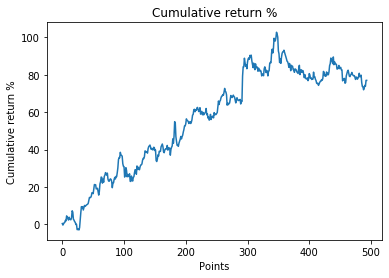

In [37]:
plt.plot(temp)
plt.xlabel("Points")
plt.ylabel("Cumulative return %")
plt.title("Cumulative return %")